In [1]:
import os

LANGCHAIN_TRACING_V2='true'
LANGCHAIN_ENDPOINT="https://api.smith.langchain.com"
LANGCHAIN_API_KEY="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"
LANGCHAIN_PROJECT="RAG_SELAB"

os.environ["LANGCHAIN_TRACING_V2"] = LANGCHAIN_TRACING_V2
os.environ["LANGCHAIN_ENDPOINT"] = LANGCHAIN_ENDPOINT
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY 
os.environ["LANGCHAIN_PROJECT"] = LANGCHAIN_PROJECT

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [3]:
from langchain_ollama import OllamaLLM
model = "llama3.2"
# model = "phi4"
llm = OllamaLLM(model=model, base_url="http://localhost:11434")

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [ ]:
messages = "test"
response = llm.invoke(messages)
print(response)

In [5]:
graph_builder.add_edge(START, "chatbot")

In [6]:
graph_builder.add_edge("chatbot", END)

In [7]:
graph = graph_builder.compile()

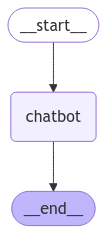

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1])


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        print("User: " + user_input)
        stream_graph_updates(user_input)
    except:
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hello
Assistant: Hello! How can I assist you today? Feel free to ask me anything or let me know how I can help. 😊
User: 你還記的我剛剛問的問題嗎
Assistant: 您好！很抱歉，作為一個 AI 語言模型，我沒有能力記住之前的對話。每次互動都是新的開始。不過，如果您重複問題或提供更多背景資訊，我會盡力幫助您解答！
User: 你是哪個模型
Assistant: 我是一款由洛桑国际学术大学研究所与微软开发的语言模型，称为Phi。我的设计目标是帮助用户提供有用、安全和尊重隐私的信息。如果你有任何问题或需要帮助，请随时告诉我！
User: 給我你的詳細資料
Assistant: 抱歉，我無法提供任何個人詳細信息。但是，如果您對於與技術或科技相關的問題有疑惑，或者需要一些一般性資訊，隨時可以告訴我！
User: LangGraph是什麼
Assistant: LangGraph 是由谷歌开发的一个用于自然语言处理（NLP）任务中关系抽取的神经网络模型。该模型主要专注于在文本中识别和提取实体之间的关系，这一任务通常被称为“关系抽取”。

LangGraph 的核心思想是使用图结构来表示文档及其内部实体与关系。它将句子中的词或短语视作图中的节点，而实体之间的潜在关系则被视为这些节点之间的边。LangGraph 利用深度学习技术和图神经网络（GNN）来有效地处理这种图结构数据，以提高关系抽取的准确性。

相比于传统的基于规则或者基于机器学习的方法，LangGraph 更加强大且灵活，能够在不同的文本语境中捕获复杂的关系。这使其在各种应用场景中都具有广泛的适用性，比如信息抽取、知识图谱构建等。

总之，LangGraph 是一种利用图结构和深度学习技术进行关系抽取的创新方法，它能够在处理复杂文本时提供更加精确和高效的结果。
Goodbye!
